## Multivaraite Datenanalyse
# Lineare Diskriminanzanalyse (LDA)
### Michael Araz, Daniel Hasenklever, Stefan Pede

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import os
import pandas as pd
import random
import scipy

# interactive
from ipywidgets.widgets import interact, IntSlider, FloatSlider
from IPython.display import display

from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from multiDatenanalyse import *

import matplotlib.pyplot as plt
%matplotlib inline

mmPfad = '../data/Messmatrix.csv'

### Eigenschaften der Messmatrix 

In [3]:
df = pd.read_csv(mmPfad)
print("Anzahl der Kennwerte: "+str(df.shape[1]))
print("Anzahl der vermessenen Rohre: "+str(df.shape[0]))
print("Anzahl der gefahrenen Produkte: "+str(df.groupby(["Header_Leitguete","Header_Soll_AD","Header_Soll_WD"])["Header_Pseudonummer"].agg(["count"]).shape[0]))
print("Anzahl der Walzlose: "+str(len(pd.unique(df["Header_Walzlos"]))))
print("\nAuszug:")
df.head()

Anzahl der Kennwerte: 88
Anzahl der vermessenen Rohre: 220995
Anzahl der gefahrenen Produkte: 27
Anzahl der Walzlose: 1435

Auszug:


,Header_Pseudonummer,Header_Walzlos,Header_Leitguete,Header_Anzahl_Bloecke_im_Los,Header_Soll_AD,Header_Soll_WD,WAS_Blockmasse,WAS_Blocklaenge,WAS_Kerntemperatur,WAS_Oberflaechentemperatur,...,SPL_Luppentemp_nach_SPL_Mittelwert,SRW_Geschw_2_Mittelwert,SRW_Geschw_2_Flaechenabw,SRW_Geschw_2_Kruemmung,SRW_Geschw_1_Mittelwert,LWW_K1_Mittelwert,LWW_K2_Mittelwert,LWW_K1_Standardabweichung,LWW_K2_Standardabweichung,LWW_Kraft_Differenz
0,1283698401,71600914,10300,177,31.8,3.6,201.0,730.8,650,712,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1283698501,71600914,10300,177,31.8,3.6,201.2,731.1,650,691,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1283698751,71600914,10300,177,31.8,3.6,201.2,732.0,650,723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1283700051,71600914,10300,177,31.8,3.6,200.6,730.8,650,727,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1283700251,71600914,10300,177,31.8,3.6,200.6,730.8,650,722,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Produkte

In [4]:
df.groupby(["Header_Leitguete","Header_Soll_AD","Header_Soll_WD"])["Header_Pseudonummer"].agg(["count"])

count
Header_Leitguete Header_Soll_AD Header_Soll_WD       
10300            21.30          2.50             6982
                 23.00          2.60             4364
                 25.00          2.40             3961
                                2.55            15312
                                2.80            11478
                                3.60             4530
                 28.00          2.60             5207
                 31.80          3.20             3798
                                3.60            10321
                 42.40          2.60             7426
                 48.30          2.60             3950
                 50.80          3.20             4509
12400            35.00          2.60             4461
                 42.40          3.60             5501
13100            21.30          3.00             5253
15000            24.99          2.90             5679
40200            30.00          2.70            24895
                 36.00          3.20             3921
                 38.00          2.60            15473
                 42.40          3.20             6762
41100            35.00          2.70             5702
90000            25.00          2.20             5062
                                2.55            11996
                 30.00          2.75            13278
                 31.80          2.60             3788
90600            21.30          2.30            10238
94800            31.80          3.30            17148

### Vorverarbeiten der Kennwerte

In [5]:
dfVV2 = preprocess(df)

# Ausgabe
print("Daten nach Vorverarbeitung:")
print("Anzahl der Kennwerte: "+str(dfVV2.shape[1]))
print("Anzahl der vermessenen Rohre: "+str(dfVV2.shape[0]))
print("Anzahl der gefahrenen Produkte: "+str(dfVV2.groupby(["Header_Leitguete","Header_Soll_AD","Header_Soll_WD"])["Header_Pseudonummer"].agg(["count"]).shape[0]))
print("Anzahl der Walzlose: "+str(len(pd.unique(dfVV2["Header_Walzlos"]))))
print("\nAuszug:")
dfVV2.head()

Daten nach Vorverarbeitung:
Anzahl der Kennwerte: 53
Anzahl der vermessenen Rohre: 165902
Anzahl der gefahrenen Produkte: 27
Anzahl der Walzlose: 1143

Auszug:


,Header_Pseudonummer,Header_Walzlos,Header_Leitguete,Header_Anzahl_Bloecke_im_Los,Header_Soll_AD,Header_Soll_WD,WAS_Blockmasse,WAS_Blocklaenge,WAS_Kerntemperatur,WAS_Oberflaechentemperatur,...,SPL_Luppentemp_nach_SPL_Mittelwert,SRW_Geschw_2_Mittelwert,SRW_Geschw_2_Flaechenabw,SRW_Geschw_2_Kruemmung,SRW_Geschw_1_Mittelwert,LWW_K1_Mittelwert,LWW_K2_Mittelwert,LWW_K1_Standardabweichung,LWW_K2_Standardabweichung,LWW_Kraft_Differenz
1913,1284882301,71602091,10300,97,23.0,2.6,169.6,620.8,650,694,...,976.761811,7.709283,0.099274,1.412236,0.977526,222.552449,208.553970,18.217502,18.534586,13.998479
1914,1284882401,71602091,10300,97,23.0,2.6,169.8,621.3,650,695,...,979.225722,7.775089,0.108683,1.641737,0.977045,218.651457,207.584116,18.542848,19.897752,11.067341
1915,1284882751,71602091,10300,97,23.0,2.6,170.6,622.1,650,701,...,978.927822,7.720654,0.104840,1.590480,0.984235,210.024042,199.598759,17.269081,18.253595,10.425283
1916,1284882851,71602091,10300,97,23.0,2.6,170.6,622.6,650,704,...,977.622047,7.731336,0.105843,1.593243,0.984812,211.561736,199.419747,18.946505,19.440466,12.141989
1917,1284884201,71602091,10300,97,23.0,2.6,170.8,621.6,650,718,...,980.927934,7.682284,0.101462,1.518679,0.993005,191.864274,175.434680,20.395898,17.117993,16.429593


In [6]:
dfNoCor, _ = dropCorrelatedColumns((dfVV2[dfVV2.columns[6:]], dfVV2[dfVV2.columns[6:]]), 0.8)
dfVV2 = pd.concat((dfVV2[dfVV2.columns[:6]], dfNoCor), axis=1)
dfVV2.head()

[[0, 1], [0, 16], [0, 21], [1, 0], [1, 16], [1, 21], [11, 12], [12, 11], [16, 0], [16, 1], [16, 21], [21, 0], [21, 1], [21, 16], [27, 33], [27, 34], [33, 27], [33, 34], [34, 27], [34, 33], [35, 36], [36, 35], [42, 43], [43, 42]]
WAS_Blockmasse  und  WAS_Blocklaenge korrelieren positiv
WAS_Blockmasse  und  SWW_Huellenlaenge korrelieren positiv
WAS_Blockmasse  und  LOP_Stoesselweg korrelieren positiv
WAS_Blocklaenge  und  SWW_Huellenlaenge korrelieren positiv
WAS_Blocklaenge  und  LOP_Stoesselweg korrelieren positiv
Zaehler_Dorn_links  und  Zaehler_Dorn_rechts korrelieren positiv
SWW_Huellenlaenge  und  LOP_Stoesselweg korrelieren positiv
SRW_WD_erste_Toleranzunterschreitung  und  SRW_WD_Laenge_Enden korrelieren positiv
SRW_WD_erste_Toleranzunterschreitung  und  SRW_WD_Anteil_Enden korrelieren positiv
SRW_WD_Laenge_Enden  und  SRW_WD_Anteil_Enden korrelieren positiv
SRW_WD_Abweichung_Soll  und  SRW_WD_realtive_Abweichung_Soll korrelieren positiv
LWW_K1_Mittelwert  und  LWW_K2_Mittelwert 

,Header_Pseudonummer,Header_Walzlos,Header_Leitguete,Header_Anzahl_Bloecke_im_Los,Header_Soll_AD,Header_Soll_WD,WAS_Blockmasse,WAS_Kerntemperatur,WAS_Oberflaechentemperatur,DHO_Entkohlung,...,SRW_WD_Abweichung_Soll,SPL_Luppentemp_nach_SPL_Mittelwert,SRW_Geschw_2_Mittelwert,SRW_Geschw_2_Flaechenabw,SRW_Geschw_2_Kruemmung,SRW_Geschw_1_Mittelwert,LWW_K1_Mittelwert,LWW_K1_Standardabweichung,LWW_K2_Standardabweichung,LWW_Kraft_Differenz
1913,1284882301,71602091,10300,97,23.0,2.6,169.6,650,694,1.4784,...,0.029625,976.761811,7.709283,0.099274,1.412236,0.977526,222.552449,18.217502,18.534586,13.998479
1914,1284882401,71602091,10300,97,23.0,2.6,169.8,650,695,1.5038,...,0.023382,979.225722,7.775089,0.108683,1.641737,0.977045,218.651457,18.542848,19.897752,11.067341
1915,1284882751,71602091,10300,97,23.0,2.6,170.6,650,701,1.4648,...,0.011250,978.927822,7.720654,0.104840,1.590480,0.984235,210.024042,17.269081,18.253595,10.425283
1916,1284882851,71602091,10300,97,23.0,2.6,170.6,650,704,1.4770,...,0.037129,977.622047,7.731336,0.105843,1.593243,0.984812,211.561736,18.946505,19.440466,12.141989
1917,1284884201,71602091,10300,97,23.0,2.6,170.8,650,718,1.4944,...,0.010617,980.927934,7.682284,0.101462,1.518679,0.993005,191.864274,20.395898,17.117993,16.429593


# Regard only one product

In [7]:
@interact(index=IntSlider(min=0, max=26, value = 0))
def count_per_product(index):
    groupby_list, product = get_product(dfVV2, index)
    df = dfVV2.query(" & ".join(["({} == {})".format(name, param) for name, param in zip(groupby_list, product)]))
    
    df_walzlos = df.groupby(["Header_Walzlos"])["Header_Pseudonummer"].agg(["count"])
    display(df_walzlos)

,count
Header_Walzlos,
71603083,59
71605002,51
71605012,16
71607962,25
71607964,31
71607965,45
71607993,86
71608686,43
71615037,7


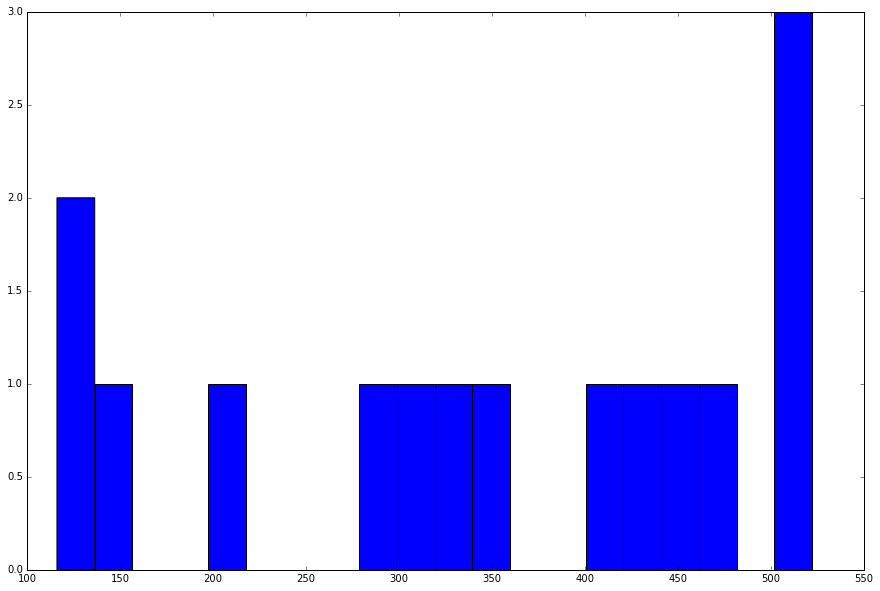

In [8]:
groupby_list, product = get_product(dfVV2, 3)
df = dfVV2.query(" & ".join(["({} == {})".format(name, param) for name, param in zip(groupby_list, product)]))

df_walzlos = df.groupby(["Header_Walzlos"])["Header_Pseudonummer"].agg(["count"])
b = np.asarray(df_walzlos)
plt.figure(figsize=(15,10))
_ = plt.hist(b, bins=20)

In [9]:
min_num_walzlos = 100
walzlose_to_drop = df_walzlos[(df_walzlos['count'] < min_num_walzlos)].index.tolist()

for walzlos in walzlose_to_drop:
    df.drop(df[df["Header_Walzlos"] == walzlos].index, inplace=True)
    
label_encoder = LabelEncoder().fit(df["Header_Walzlos"])

In [10]:
train_set, test_set = get_data(df, label_encoder)

# Normalize data

In [11]:
train_set['data'], train_mean, train_std = zscore(train_set['data'])
test_set['data'], test_mean, test_mean = zscore(test_set['data'], train_mean, train_std)

# How different are train and test set?

Wie ähnlich sind sich test und train set?


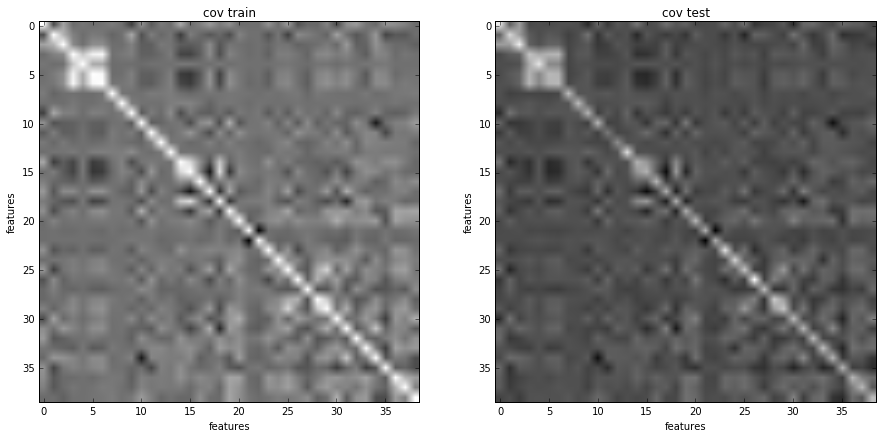

In [12]:
cov_train = np.cov(train_set['data'].T)
cov_test = np.cov(test_set['data'].T)

plt.figure(figsize=(15,10))
ax1 = plt.subplot(121)
ax1.imshow(225*(cov_train-np.max(cov_train))/(np.max(cov_train)-np.min(cov_train)), 'gray')
ax1.set_title('cov train')
ax1.set_xlabel('features')
ax1.set_ylabel('features')

ax2 = plt.subplot(122)
ax2.imshow(225*(cov_test-np.max(cov_test))/(np.max(cov_test)-np.min(cov_test)), 'gray')
ax2.set_title('cov test')
ax2.set_xlabel('features')
ax2.set_ylabel('features')
print('Wie ähnlich sind sich test und train set?')

# LDA

In [13]:
X_train, y_train = train_set['data'][:, :], train_set['label']
X_test, y_test = test_set['data'][:, :], test_set['label']

In [154]:
n_components = 2

sklearn_LDA = LDA(n_components=n_components, solver='eigen')
sklearn_LDA = sklearn_LDA.fit(X_train, y_train)

<Container object of 3 artists>

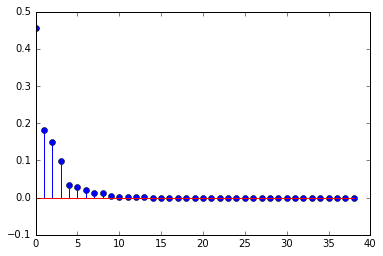

In [155]:
plt.stem(sklearn_LDA.explained_variance_ratio_)

In [156]:
train_pred = sklearn_LDA.predict(X_train)
print('{0:.6f}% train accuracy'.format(100*np.mean(train_pred == y_train)))

test_pred = sklearn_LDA.predict(X_test)
print('{0:.6f}% test accuracy'.format(100*np.mean(test_pred == y_test)))

88.127413% train accuracy
87.439143% test accuracy


In [157]:
data = sklearn_LDA.transform(X_train)

In [158]:
data.shape

(4144, 2)

In [159]:
def plot_lda(X_lda, y, title, ax=None):
    if ax:
        ax = ax
    else:
        plt.figure(figsize=(10,5))
        ax = plt.subplot(111)
        
    for color, label in enumerate(np.unique(y)):
        min_val = 0
        max_val = 14

        my_cmap = plt.cm.get_cmap('rainbow') # or any other one
        norm = matplotlib.colors.Normalize(min_val, max_val) # the color maps work for [0, 1]

        color_i = my_cmap(norm(color)) # returns an rgba value

        ax.scatter(X_lda[:,0][y==label], X_lda[:,1][y==label], marker='*', color=color_i,
                    label=label, alpha=1)
        
    ax.set_xlabel('LDA_1')
    ax.set_ylabel('LDA_2')
    ax.set_title(title)
    
    ax.legend()
    ax.grid()                   

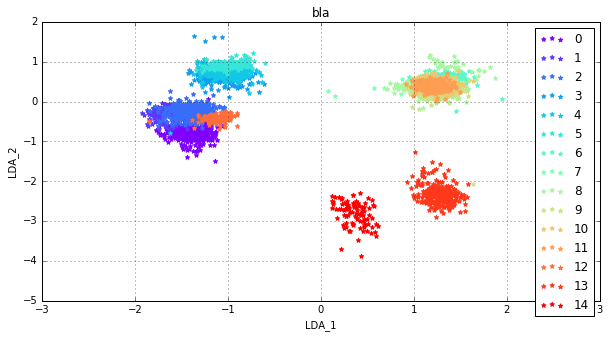

In [160]:
plot_lda(data, y_train, 'bla')

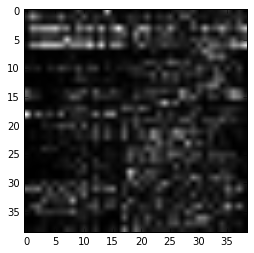

In [163]:
plt.imshow(np.abs(eigvecs), 'gray')

In [169]:
df[df.columns[6:]].columns[18]

'LOP_Geschw'

In [114]:
eigvecs = sklearn_LDA.scalings_

In [102]:
eigvecs.shape

(39, 39)

In [108]:
np.argmax(np.abs(eigvecs[:, 0]))

18